<a href="https://colab.research.google.com/github/aeshna25/Future-Daily-Sales-/blob/main/Sales_use_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales_train_df = pd.read_csv('/content/drive/MyDrive/Data Science for Business Package/3. Sales Department Data/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
sales_train_df.head(3) #(1017209, 9)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [ ]:
sales_train_df.shape

(1017209, 9)

In [ ]:
sales_train_df.info()

#sales: sales/day is the target value
# we have more than a million records span is 2 years times
#8 observational features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.0000,1017209.0000,1017209.0000,1017209.0000,1017209.0000,1017209.0000,1017209.0000
mean,558.4297,3.9983,5773.8190,633.1459,0.8301,0.3815,0.1786
std,321.9087,1.9974,3849.9262,464.4117,0.3755,0.4858,0.3831
min,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,280.0000,2.0000,3727.0000,405.0000,1.0000,0.0000,0.0000
50%,558.0000,4.0000,5744.0000,609.0000,1.0000,0.0000,0.0000
75%,838.0000,6.0000,7856.0000,837.0000,1.0000,1.0000,0.0000
max,1115.0000,7.0000,41551.0000,7388.0000,1.0000,1.0000,1.0000


1. Mean sales/day: 5773 euros, min=0 (holiday) max= 41551 euros
2. Average no of customer visiting per day 633, min=0 and max=7388

In [ ]:
store_info_df=pd.read_csv('/content/drive/MyDrive/Data Science for Business Package/3. Sales Department Data/store.csv')

In [ ]:
store_info_df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0000,9.0000,2008.0000,0,NaN,NaN,NaN
1,2,a,a,570.0000,11.0000,2007.0000,1,13.0000,2010.0000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0000,12.0000,2006.0000,1,14.0000,2011.0000,"Jan,Apr,Jul,Oct"


In [ ]:
store_info_df.shape

(1115, 10)

In [ ]:
store_info_df.info()
#1115 stores information
#9 features of the stores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.0000,1112.0000,761.0000,761.0000,1115.0000,571.0000,571.0000
mean,558.0000,5404.9011,7.2247,2008.6689,0.5121,23.5954,2011.7636
std,322.0171,7663.1747,3.2123,6.1960,0.5001,14.1420,1.6749
min,1.0000,20.0000,1.0000,1900.0000,0.0000,1.0000,2009.0000
25%,279.5000,717.5000,4.0000,2006.0000,0.0000,13.0000,2011.0000
50%,558.0000,2325.0000,8.0000,2010.0000,1.0000,22.0000,2012.0000
75%,836.5000,6882.5000,10.0000,2013.0000,1.0000,37.0000,2013.0000
max,1115.0000,75860.0000,12.0000,2015.0000,1.0000,50.0000,2015.0000


1. Avg distance b/w two stores (competiotiondistance): 5.4km , min=20m and max= 75km
2. Competition opened ranges from 1900:2015
 

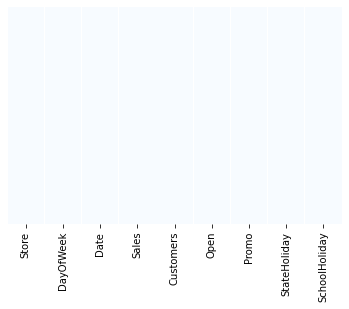

In [ ]:
#data expolaration 

#missing data

sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False,cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f667cd8bed0>,
      dtype=object)

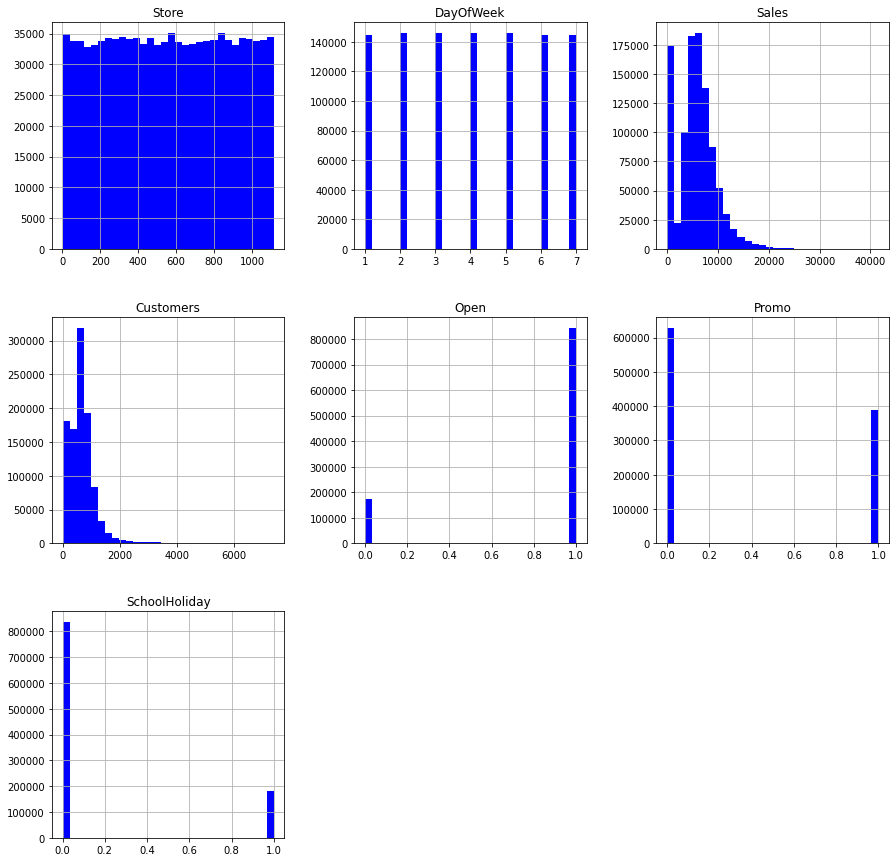

In [ ]:
sales_train_df.hist(bins=30, figsize=(15,15), color='b')

1. Opem, promo and school day are binary values
  1. Stores are open most of the time
  2. Promo is given by less stores
  3. There are not many school holidays
2. Sales and customers are continuous and are tail heavy
3. Day of week isn't providing much info and can be dropped


In [ ]:
sales_train_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [ ]:
# since no information is there for closed stores, those can be removed
open_stores_df= sales_train_df[sales_train_df.Open==1]
open_stores_df=open_stores_df.drop(['Open'],axis=1)
open_stores_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1


In [ ]:
open_stores_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.0000,844392.0000,844392.0000,844392.0000,844392.0000,844392.0000
mean,558.4229,3.5204,6955.5143,762.7284,0.4464,0.1936
std,321.7319,1.7237,3104.2147,401.2277,0.4971,0.3951
min,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
25%,280.0000,2.0000,4859.0000,519.0000,0.0000,0.0000
50%,558.0000,3.0000,6369.0000,676.0000,0.0000,0.0000
75%,837.0000,5.0000,8360.0000,893.0000,1.0000,0.0000
max,1115.0000,7.0000,41551.0000,7388.0000,1.0000,1.0000


1. Mean sales/day: 6955 euros, min=0 (holiday) max= 41551 euros
2. Average no of customer visiting per day 762, min=0 and max=7388

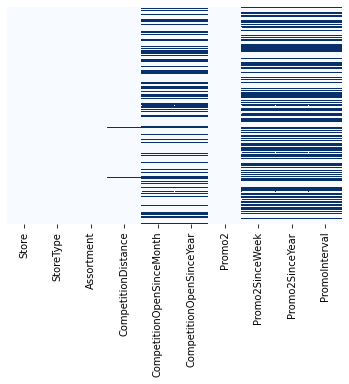

In [ ]:
# data exploration: store

sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False,cmap='Blues')

In [ ]:
store_info_df[store_info_df.CompetitionDistance.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0000,2013.0000,"Feb,May,Aug,Nov"


Only 3 values are missing for Competition distance
whereas more than 300 values (out of 1000+) are missing for CompetitionOpenSinceMonth and CompetitionOpenSinceYear


In [ ]:
store_info_df[store_info_df.Promo2==0].value_counts

<bound method DataFrame.value_counts of       Store StoreType Assortment  CompetitionDistance  \
0         1         c          a            1270.0000   
3         4         c          c             620.0000   
4         5         a          a           29910.0000   
5         6         a          a             310.0000   
6         7         a          c           24000.0000   
...     ...       ...        ...                  ...   
1107   1108         a          a             540.0000   
1109   1110         c          c             900.0000   
1111   1112         c          c            1880.0000   
1112   1113         a          c            9260.0000   
1113   1114         a          c             870.0000   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0000                 2008.0000       0   
3                        9.0000                 2009.0000       0   
4                        4.0000                 2015.0000       0   

When Promo2 =0 than  Promo2SinceWeek  Promo2SinceYear PromoInterval are Nan, hence we can fill those value with 0

In [ ]:
missing_col=[ 'Promo2SinceWeek',  'Promo2SinceYear', 'PromoInterval','CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear' ]
for col in missing_col:
  store_info_df[col].fillna(0,inplace=True)

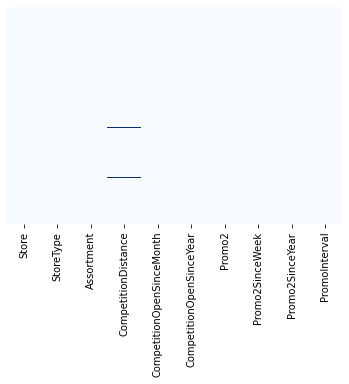

In [ ]:
#check the missing values now
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False,cmap='Blues')

In [ ]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(),inplace=True)

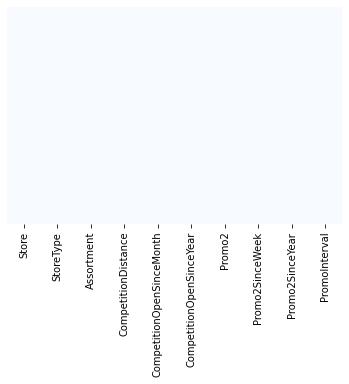

In [ ]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False,cmap='Blues')

No missing data now!!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f667c1be150>,
      dtype=object)

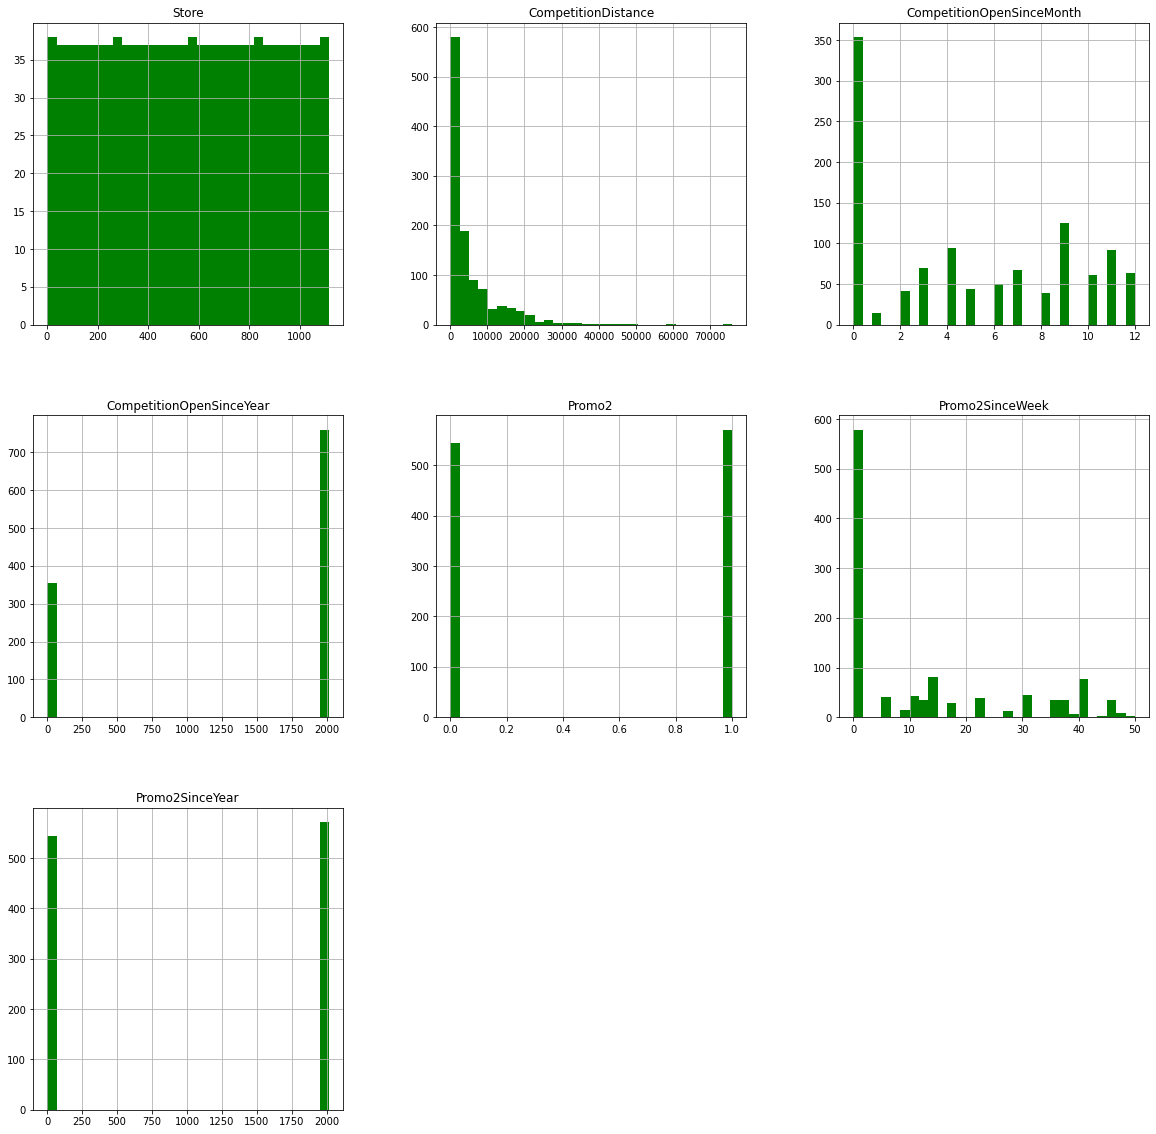

In [ ]:
store_info_df.hist(bins=30, figsize=(20,20),color='g')

In [ ]:
#merge both df
sales_train_all_df= pd.merge(store_info_df,open_stores_df,on=['Store'],how='inner')

In [ ]:
sales_train_all_df.shape #(844392, 20)
sales_train_all_df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0000,9.0000,2008.0000,0,0.0000,0.0000,0,5,2015-07-31,5263,555,1,0,1
1,1,c,a,1270.0000,9.0000,2008.0000,0,0.0000,0.0000,0,4,2015-07-30,5020,546,1,0,1
2,1,c,a,1270.0000,9.0000,2008.0000,0,0.0000,0.0000,0,3,2015-07-29,4782,523,1,0,1


In [ ]:
#correlation in the data
correlation= sales_train_all_df.corr()['Sales'].sort_values()
correlation

DayOfWeek                   -0.1787
Promo2SinceYear             -0.1276
Promo2                      -0.1276
Promo2SinceWeek             -0.0585
CompetitionDistance         -0.0363
CompetitionOpenSinceMonth   -0.0184
CompetitionOpenSinceYear     0.0053
Store                        0.0077
SchoolHoliday                0.0386
Promo                        0.3681
Customers                    0.8236
Sales                        1.0000
Name: Sales, dtype: float64

1. No of daily customers have a high positive correlation with sales.
2. Promo has a correlation with sales, but Promo 2 has none

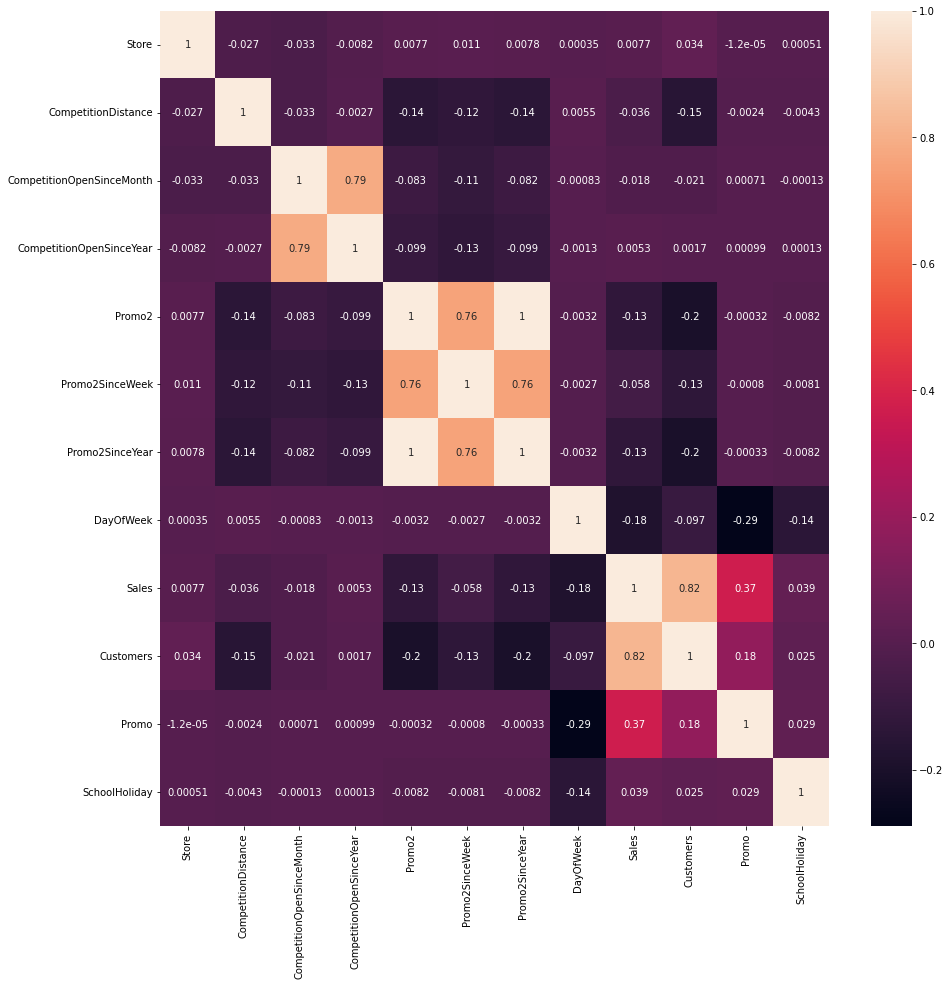

In [ ]:
correlation= sales_train_all_df.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(correlation, annot=True)

In [ ]:
sales_train_all_df['Year']= pd.DatetimeIndex(open_stores_df['Date']).year
sales_train_all_df['Month']= pd.DatetimeIndex(open_stores_df['Date']).month
sales_train_all_df['Day']= pd.DatetimeIndex(open_stores_df['Date']).day
sales_train_all_df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,c,a,1270.0000,9.0000,2008.0000,0,0.0000,0.0000,0,5,2015-07-31,5263,555,1,0,1,2015,7,31
1,1,c,a,1270.0000,9.0000,2008.0000,0,0.0000,0.0000,0,4,2015-07-30,5020,546,1,0,1,2015,7,31
2,1,c,a,1270.0000,9.0000,2008.0000,0,0.0000,0.0000,0,3,2015-07-29,4782,523,1,0,1,2015,7,31


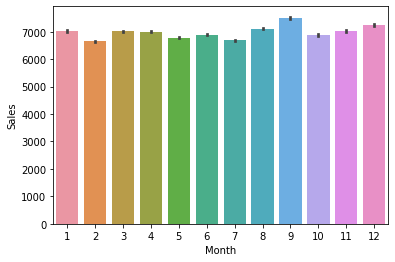

In [ ]:
# relation b/w month and sales
sns.barplot(x='Month',y='Sales',data=sales_train_all_df)

Text(0.5, 1.0, 'Average Sales Per Month')

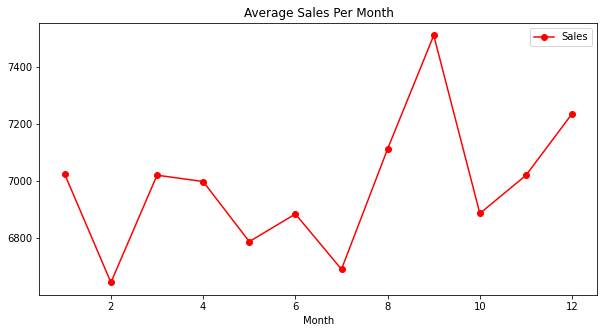

In [ ]:
axis= sales_train_all_df.groupby(['Month']).agg({'Sales':'mean'}).plot(figsize=(10,5),marker='o',color='r')
axis.set_title('Average Sales Per Month')

Text(0.5, 1.0, 'Average Customers Per Month')

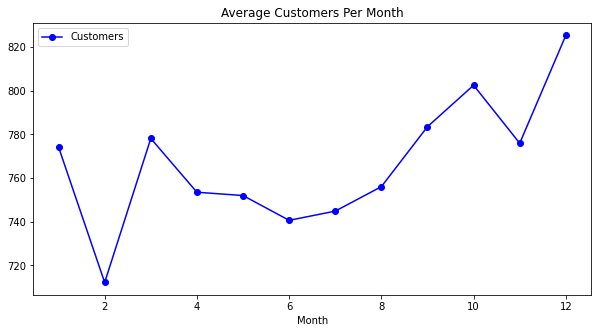

In [ ]:
axis= sales_train_all_df.groupby(['Month']).agg({'Customers':'mean'}).plot(figsize=(10,5),marker='o',color='b')
axis.set_title('Average Customers Per Month')

Text(0.5, 1.0, 'Average Customers Per Day')

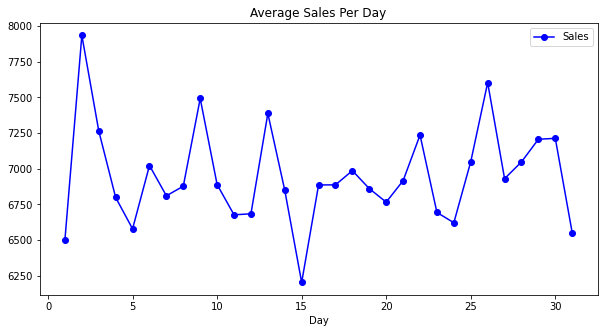

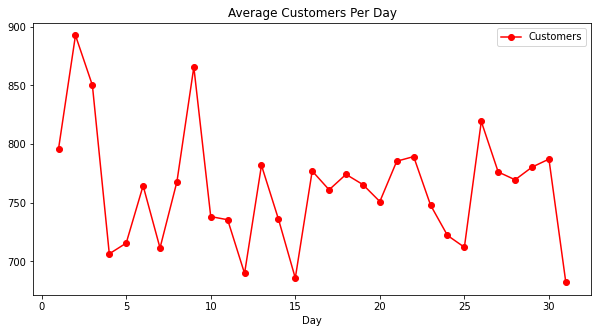

In [ ]:
axis= sales_train_all_df.groupby(['Day']).agg({'Sales':'mean'}).plot(figsize=(10,5),marker='o',color='b')
axis.set_title('Average Sales Per Day')


axis= sales_train_all_df.groupby(['Day']).agg({'Customers':'mean'}).plot(figsize=(10,5),marker='o',color='r')
axis.set_title('Average Customers Per Day')

Text(0.5, 1.0, 'Average Customers Per DayOfWeek')

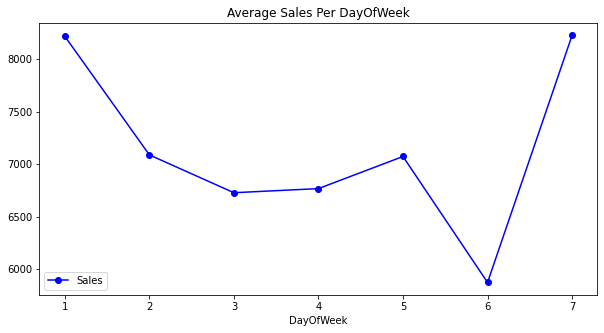

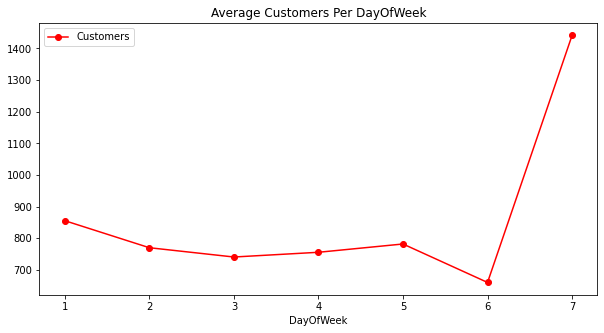

In [ ]:
axis= sales_train_all_df.groupby(['DayOfWeek']).agg({'Sales':'mean'}).plot(figsize=(10,5),marker='o',color='b')
axis.set_title('Average Sales Per DayOfWeek')


axis= sales_train_all_df.groupby(['DayOfWeek']).agg({'Customers':'mean'}).plot(figsize=(10,5),marker='o',color='r')
axis.set_title('Average Customers Per DayOfWeek')

Month:
1. Sales: After 7th month the sales are usually high, seeing peak from 9 and 12th
2. Customers: After 7th month the sales are usually high, seeing peak from 10 and 12th

Day:
1. Sales: People usually buy at the end or starting of the month
2. Customers: People usually come at the end or starting of the month

Day of week:
1. Sales: People usually buy on Sunday or Monday
2. Customers: People usually come on sunday


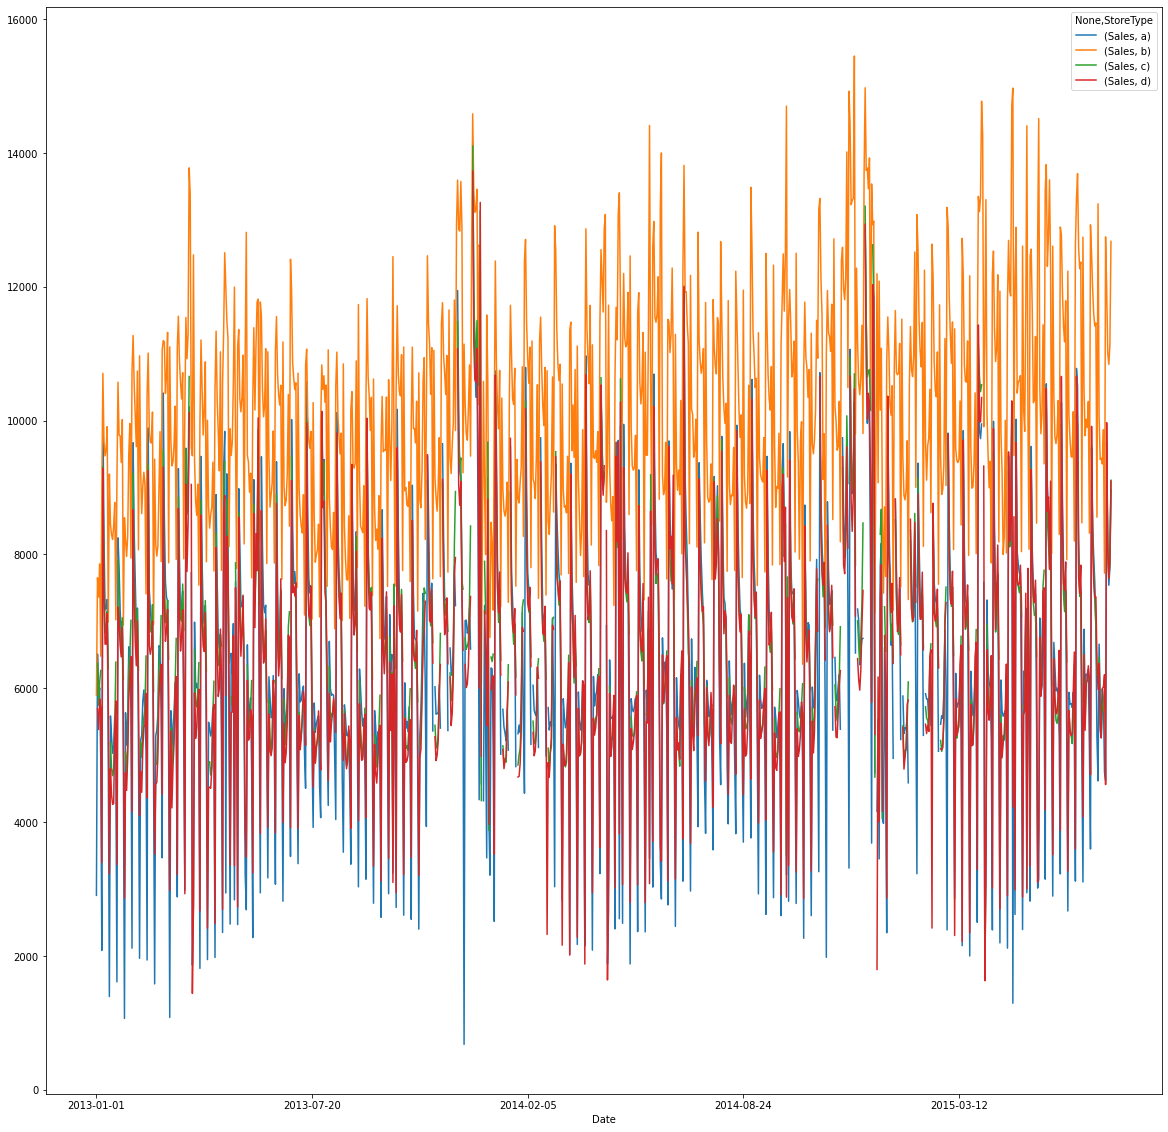

In [ ]:
#look at how sales is based on storetype(a,b,c,d)

f,ax= plt.subplots(figsize=(20,20))
axis= sales_train_all_df.groupby(['Date','StoreType']).agg({'Sales':'mean'}).unstack().plot(ax=ax)

Store B has Highest values of sales

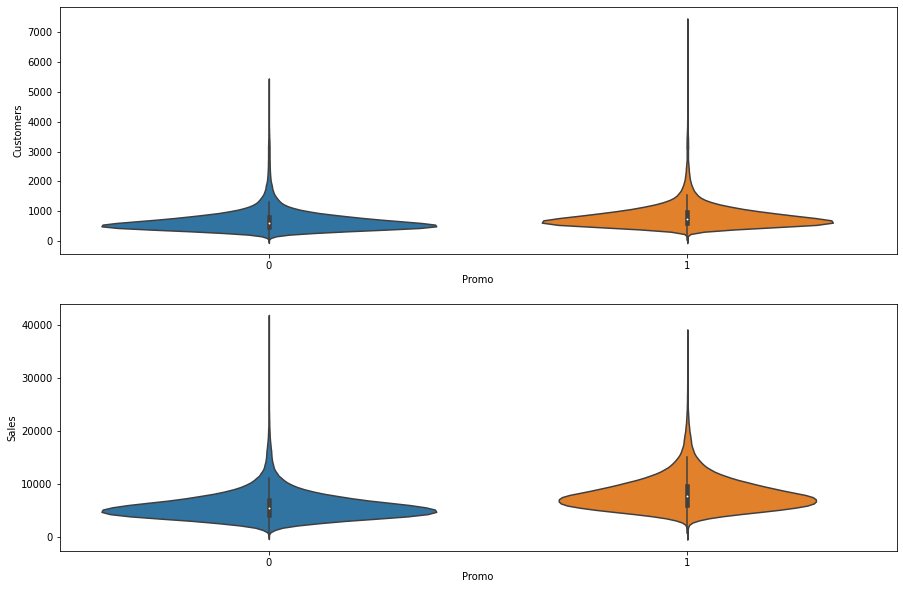

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.violinplot(x='Promo',y='Customers', data=sales_train_all_df)
plt.subplot(212)
sns.violinplot(x='Promo',y='Sales', data=sales_train_all_df)

Promo increases sales and customer footfall

In [ ]:
!pip install fbprophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


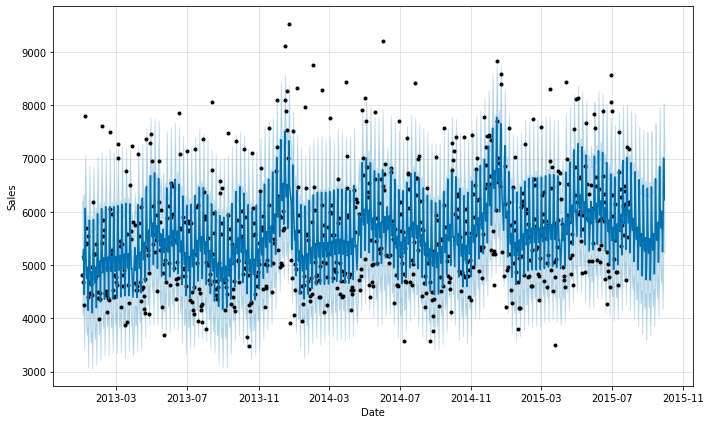

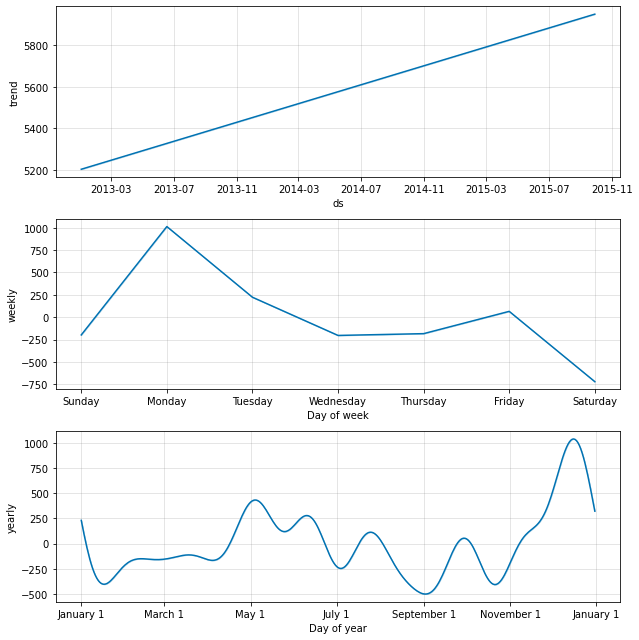

In [ ]:
from fbprophet import Prophet

def sales_prediction(Store_ID,sales_df,periods):
  sales_df= sales_df[sales_df['Store']== Store_ID]
  sales_df= sales_df[['Date','Sales']].rename(columns={'Date':'ds',
                                                       'Sales':'y'})
  sales_df= sales_df.sort_values('ds')
  model= Prophet()
  model.fit(sales_df)
  future= model.make_future_dataframe(periods=periods)
  forecast= model.predict(future)
  figure= model.plot(forecast,xlabel='Date',ylabel='Sales')
  figure2= model.plot_components(forecast)

  # return sales_df
df=sales_prediction(10,open_stores_df,60) #for stor 10,60 days ahead predictions
df

The fb prophet was able to produce sales for future (1st graph) and give component predictions(yearly, weekly, trend)


In [ ]:
## include holidays (publicholidays) in addition to date 


   - StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   - SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
  






In [ ]:
print(sales_train_all_df.StateHoliday.value_counts())
sales_train_all_df.SchoolHoliday.value_counts()

0    731342
0    112140
a       694
b       145
c        71
Name: StateHoliday, dtype: int64


0    680935
1    163457
Name: SchoolHoliday, dtype: int64

In [ ]:
def sales_prediction(Store_ID,sales_df,holidays,periods):
  sales_df= sales_df[sales_df['Store']== Store_ID]
  sales_df= sales_df[['Date','Sales']].rename(columns={'Date':'ds',
                                                       'Sales':'y'})
  sales_df= sales_df.sort_values('ds')
  model= Prophet(holidays=holidays)
  model.fit(sales_df)
  future= model.make_future_dataframe(periods=periods)
  forecast= model.predict(future)
  figure= model.plot(forecast,xlabel='Date',ylabel='Sales')
  figure2= model.plot_components(forecast)

  # return sales_df
# df=sales_prediction(10,open_stores_df,,60)
# df


In [ ]:
school_holidays= sales_train_all_df[sales_train_all_df.SchoolHoliday==1].loc[:,'Date'].values

In [ ]:
school_holidays.shape

(163457,)

In [ ]:
state_holidays= sales_train_all_df[(sales_train_all_df.StateHoliday== 'a') |(sales_train_all_df.StateHoliday== 'b') |(sales_train_all_df.StateHoliday== 'c')].loc[:,'Date'].values

In [ ]:
state_holidays.shape

(910,)

In [ ]:
state_holidays= pd.DataFrame({'ds':pd.to_datetime(state_holidays),'holiday':'state_holidays'})
state_holidays

,ds,holiday
0,2014-10-03,state_holidays
1,2013-10-03,state_holidays
2,2015-06-04,state_holidays
3,2014-06-19,state_holidays
4,2013-05-30,state_holidays
...,...,...
905,2013-04-01,state_holidays
906,2013-08-15,state_holidays
907,2015-06-04,state_holidays
908,2014-06-19,state_holidays


In [ ]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-01-07,school_holiday
163453,2013-01-05,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [ ]:
school_state_holidays= pd.concat([state_holidays, school_holidays])

In [ ]:
school_state_holidays

,ds,holiday
0,2014-10-03,state_holidays
1,2013-10-03,state_holidays
2,2015-06-04,state_holidays
3,2014-06-19,state_holidays
4,2013-05-30,state_holidays
...,...,...
163452,2013-01-07,school_holiday
163453,2013-01-05,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


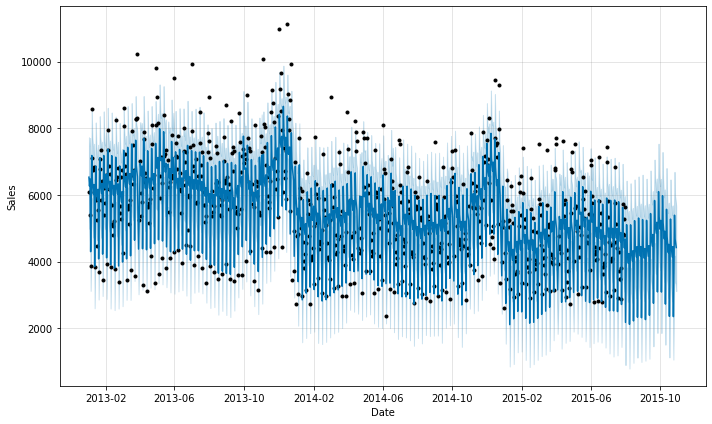

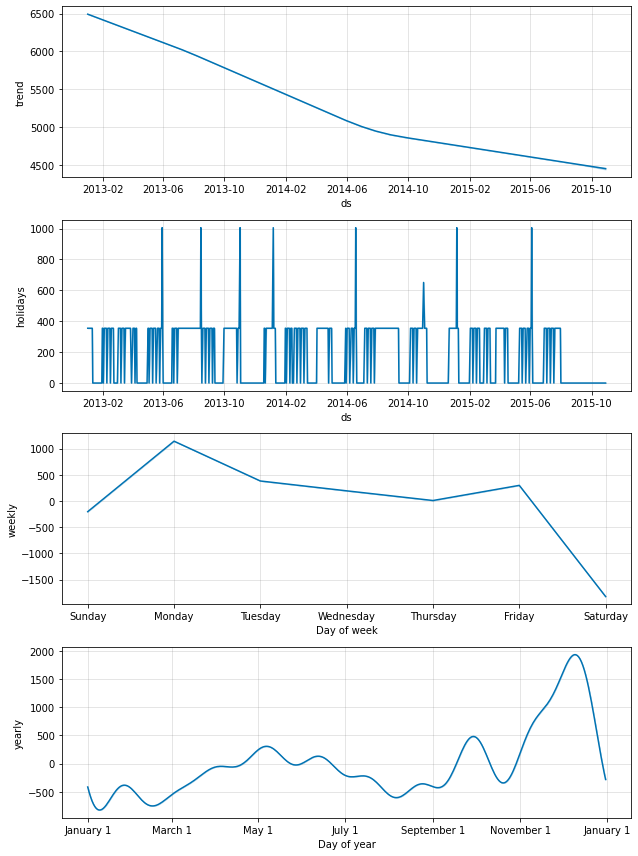

In [ ]:
sales_prediction(6,sales_train_all_df,school_state_holidays,90) #for stor 6 90 days ahead predictions

For the particular prediction for the next 90 days were made (1st graph)
The trend for this store seems to be going down, through 2 years. Weekly and Yearly trend seems to be the same as any other store
